# Projet P5 - IMDB

In [150]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
# Import des modules et librairies
%matplotlib inline
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration des données

In [152]:
#Affichages de toutes les colonnes
pd.set_option("display.max_columns", None)
# Chargement des données
df = pd.read_csv("./Datas/5000_movies_bis.csv")
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


#### *Composition détaillée du Dataset* : 
##### *IMDB : Internet Movie Database*
- __color__ : Si le film est en N&B / Couleur
- __director_name__ : Nom du réalisateur du film
- __num_critic_for_reviews__ : Nbr de critiques
- __duration__ : Durée du film (min)
- __director_fb_likes__ : Nbr de "likes" sur la page FB du réalisateur
- __actor_3_fb_likes__ : Nbr de "likes" de l'acteur sur sa page FB
- __actor_2_name__ : Nom de l'acteur secondaire
- __actor_1_fb_likes__ : Nbr de "likes" de l'acteur principal sur sa page FB
- __gross__ : Recettes brutes du film (en dollars)
- __genres__ : Catégories du film (Comédie, Romance, Horreur, Science-Fiction, etc.)
- __actor_1_name__ : Nom de l'acteur principal
- __movie_title__ : Titre du film
- __num_voted_users__ : Nbr de personnes ayant voté
- __cast_total_fb_likes__ : Nbr total de likes FB (Casting complet)
- __actor_3_name__ : Nom de l'acteur (3)
- __facenumber_in_poster__ : Nbr de figurants sur l'affiche du film
- __plot_keywords__ : Mots clés décrivant l'intrigue du film
- __movie_imdb_link__ : Lien IMDB du film
- __num_user_for_reviews__ : Nbr d'utilisateurs ayant donné une note
- __language__ : Langue du film
- __country__ : Pays où le film est produit
- __content_rating__ : Evaluation du contenu du film
- __budget__ : Budget du film (en dollars)
- __title_year__ : Année de sortie du film
- __actor_2_fb_likes__ : Nbr de "likes" de l'acteur secondaire sur sa page FB
- __imbd_score__ : Score IMBD du film 
- __aspect_ratio__ : Ratio (format image)
- __movie_fb_likes__ : Nbr de "likes" sur la page FB du film

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

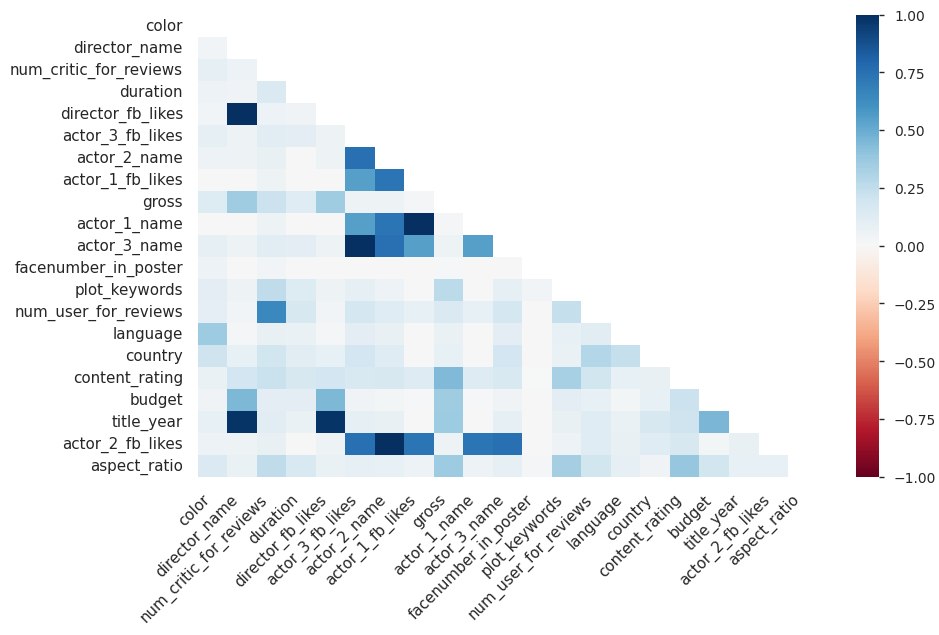

In [4]:
#Possibilité de générer un rapport détaillé du dataset au format html
profile = ProfileReport(df, title="Profiling Report - IMBD Dataset")
profile.to_file("IMDB_dataset_report.html")

In [153]:
# Dimensions du dataset
df.shape

(5043, 28)

In [154]:
# Première analyse avec info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_fb_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_fb_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_fb_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4366.0,4.672094e+07,6.736555e+07,162.00,4587414.50,24004159.00,59548719.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_fb_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


Nous voyons que le dataset contient 2 grands types de données :
- des données numériques : num_critic_for_reviews, duration, director_facebook_likes, actors facebook likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget, title_year, imdb_score, etc...
- des données catégorielles : color, director name, actors name, genres, titre, langue, pays...

Notre variable à expliquer (prédire) est : **imdb_score**

### Analyse de la colonne movie_imdb_link

In [156]:
# Que contient-elle ?
df["movie_imdb_link"]

0       http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1       http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2       http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3       http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4       http://www.imdb.com/title/tt5289954/?ref_=fn_t...
                              ...                        
5038    http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039    http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040    http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041    http://www.imdb.com/title/tt2070597/?ref_=fn_t...
5042    http://www.imdb.com/title/tt0378407/?ref_=fn_t...
Name: movie_imdb_link, Length: 5043, dtype: object

In [157]:
# Cette variable n'est pas explicative, on la supprime
df.drop('movie_imdb_link', axis=1, inplace=True)
df.shape

(5043, 27)

### Analyse de la colonne color

In [158]:
# Répartition des valeurs
df["color"].value_counts()

color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [159]:
# La très grande majorité des films sont en couleur, cette variable ne sera pas explicative, on la supprime
df.drop('color', axis=1, inplace=True)
df.shape

(5043, 26)

### Analyse de la colonne language

In [160]:
# Répartition des valeurs
df["language"].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [161]:
# La très grande majorité des films sont en anglais, cette variable ne sera pas explicative, on la supprime
df.drop('language', axis=1, inplace=True)
df.shape

(5043, 25)

### Analyse de la colonne country

In [162]:
# Répartition des valeurs
df["country"].value_counts()

country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

In [163]:
# Nous pouvons raisonnablement réorganiser cette colonne en 3 valeurs distinctes : USA, UK, et Other
df["country"] = df["country"].where(df["country"].isin(["USA", "UK"]), "Other")
df["country"]

0         USA
1         USA
2          UK
3         USA
4       Other
        ...  
5038    Other
5039      USA
5040      USA
5041      USA
5042      USA
Name: country, Length: 5043, dtype: object

### Analyse des valeurs manquantes

In [164]:
# Y'en a-t-il ?
df.isna().any()

director_name              True
num_critic_for_reviews     True
duration                   True
director_fb_likes          True
actor_3_fb_likes           True
actor_2_name               True
actor_1_fb_likes           True
gross                      True
genres                    False
actor_1_name               True
movie_title               False
num_voted_users           False
cast_total_fb_likes       False
actor_3_name               True
facenumber_in_poster       True
plot_keywords              True
num_user_for_reviews       True
country                   False
content_rating             True
budget                     True
title_year                 True
actor_2_fb_likes           True
imdb_score                False
aspect_ratio               True
movie_fb_likes            False
dtype: bool

In [165]:
### Combien ?
df.isna().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             153
num_user_for_reviews       21
country                     0
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              329
movie_fb_likes              0
dtype: int64

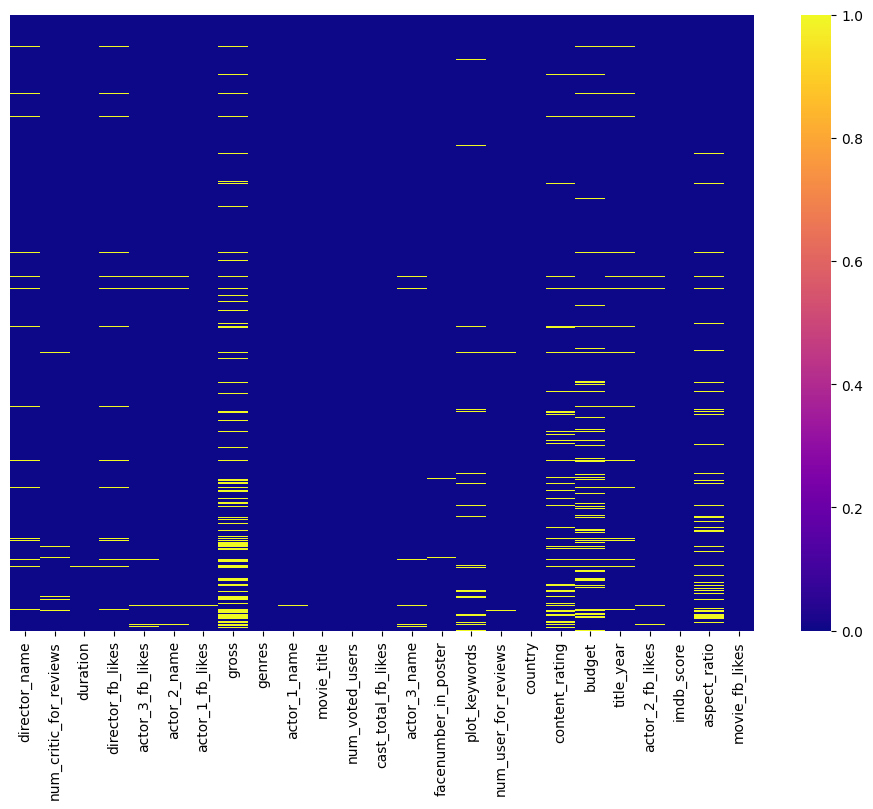

In [166]:
# Visualisation
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

In [167]:
# Beaucoup de colonnes ont peu de valeurs manquantes, on peut se permettre de les enleverver sans pour autant perdre beaucoup d'information
# Nous prenons la décision d'enlever les valeurs manquantes dans les colonnes qui en comptent moins de 5%, soit environ 250 valeurs
columns_to_clean = ['director_name', 'num_critic_for_reviews', 'duration', 'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes',
                    'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'country', 'title_year',
                    'actor_2_fb_likes']
df.dropna(axis = 0, subset = columns_to_clean, inplace = True)
df.shape

(4745, 25)

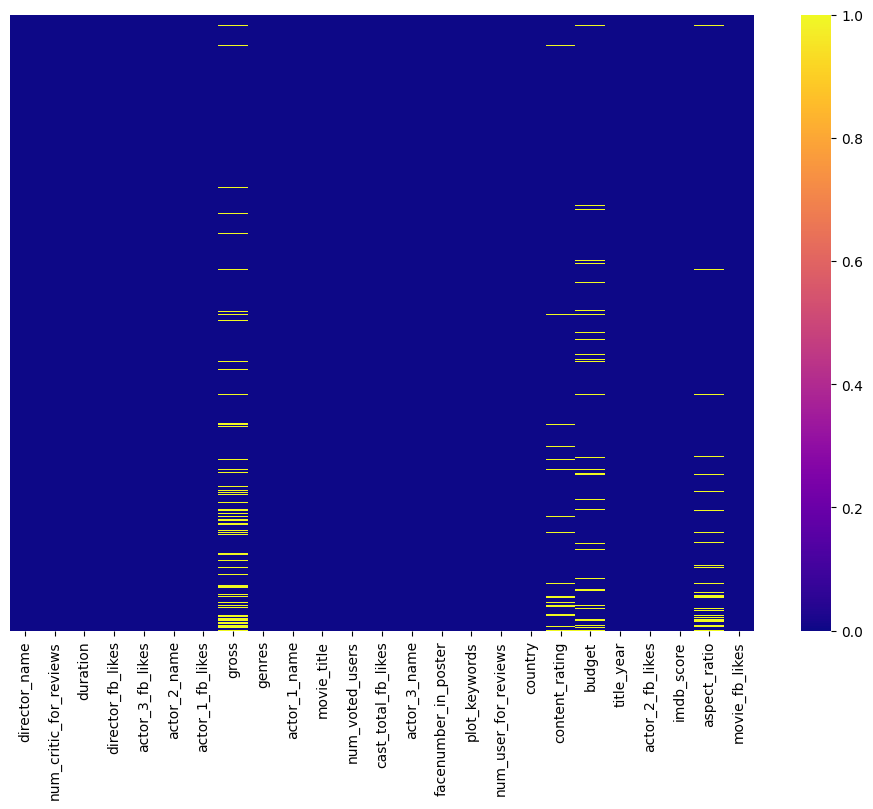

In [168]:
# Visualisation #2
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

Gestion des valeurs manquantes de la colonne **gross**

In [169]:
# Distribution des valeurs
df["gross"].describe()

count    4.285000e+03
mean     4.738806e+07
std      6.761460e+07
min      1.620000e+02
25%      5.023275e+06
50%      2.484829e+07
75%      6.005764e+07
max      7.605058e+08
Name: gross, dtype: float64

In [170]:
# Nous faisons le choix de remplacer les valeurs manquantes par la valeur médiane de la distribution,
# pour ne pas influer négativement sur le résultat du futur modèle
df["gross"].fillna(df["gross"].median(), inplace=True)

Gestion des valeurs manquantes de la colonne **content_rating**

In [171]:
# Analyse des valeurs
df["content_rating"].value_counts()

content_rating
R            2083
PG-13        1436
PG            683
G             109
Not Rated     102
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: count, dtype: int64

In [172]:
# Nous faisons le choix de remplacer les valeurs manquantes par la valeur la plus représentée
df["content_rating"].fillna("R", inplace=True)

Gestion des valeurs manquantes de la colonne **budget**

In [173]:
# Distribution des valeurs
df["budget"].describe(), df["budget"].median()

(count    4.474000e+03
 mean     4.047844e+07
 std      2.077930e+08
 min      2.180000e+02
 25%      7.000000e+06
 50%      2.000000e+07
 75%      4.500000e+07
 max      1.221550e+10
 Name: budget, dtype: float64,
 20000000.0)

In [174]:
# Même choix que pour la colonne gross
df["budget"].fillna(df["budget"].median(), inplace=True)

Gestion des valeurs manquantes de la colonne **aspect_ratio**

In [175]:
# Distribution des valeurs
df["aspect_ratio"].describe(), df["aspect_ratio"].median()

(count    4534.000000
 mean        2.115240
 std         0.648723
 min         1.180000
 25%         1.850000
 50%         2.350000
 75%         2.350000
 max        16.000000
 Name: aspect_ratio, dtype: float64,
 2.35)

In [176]:
# Même choix que pour la colonne gross
df["aspect_ratio"].fillna(df["aspect_ratio"].median(), inplace=True)

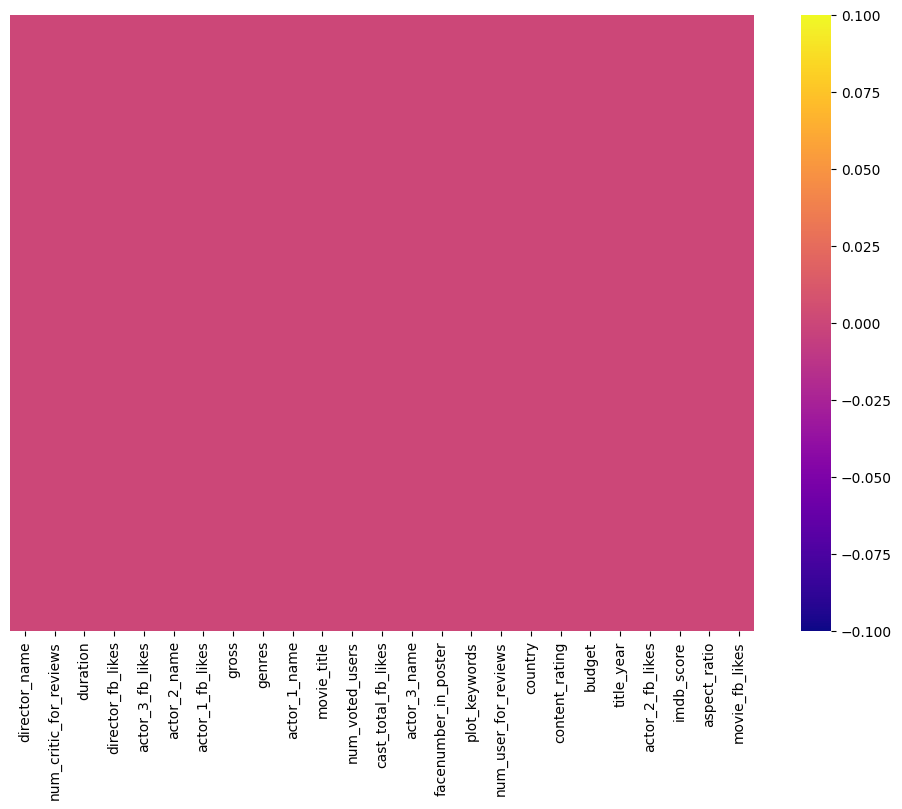

In [177]:
# Visualisation #3 pour valider que nous n'avons plus de valeur manquante dans les données
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='plasma');

### Valeurs doublons ?

In [178]:
df.loc[df.duplicated()].shape

(42, 25)

In [179]:
# Après nettoyage, 42 entrées sont des doublons. On les supprime
df.drop_duplicates(inplace=True)
df.shape

(4703, 25)

### Deuxième rapport ydata, après nettoyage

In [32]:
profile = ProfileReport(df, title="Profiling Report - IMBD Clean Dataset")
profile.to_file("IMDB_clean_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Gestion des variables textuelles

Pour cet exercice, nous ne souhaitons pas mettre en place de modèle NLP pour l'analyse du texte. Nous allons supprimer toutes les variables contenant des noms, qui ne nous servirons pas pour notre prédiction : director_name, actor_{i}_name, movie_title, plot_keywords

In [180]:
df.drop(columns=["director_name", "actor_1_name", "actor_2_name", "actor_3_name", "plot_keywords", "movie_title"], axis=1, inplace=True)

In [181]:
df.shape, df.columns

((4703, 19),
 Index(['num_critic_for_reviews', 'duration', 'director_fb_likes',
        'actor_3_fb_likes', 'actor_1_fb_likes', 'gross', 'genres',
        'num_voted_users', 'cast_total_fb_likes', 'facenumber_in_poster',
        'num_user_for_reviews', 'country', 'content_rating', 'budget',
        'title_year', 'actor_2_fb_likes', 'imdb_score', 'aspect_ratio',
        'movie_fb_likes'],
       dtype='object'))

Colonne **genres**

In [183]:
df["genres"].value_counts()

Drama                                                     209
Comedy                                                    186
Comedy|Drama|Romance                                      182
Comedy|Drama                                              180
Comedy|Romance                                            150
                                                         ... 
Adventure|Drama|History|Romance|War                         1
Action|Biography|Drama|History|Romance|Western              1
Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi|Sport      1
Adventure|Comedy|Family|Fantasy|Horror|Mystery              1
Comedy|Crime|Horror                                         1
Name: genres, Length: 878, dtype: int64

In [184]:
# Les principaux genres sont plutôt bien équilibrés, cette colonne n'apporte pas d'information pertinente, on la supprime
df.drop("genres", axis=1, inplace=True)

Colonne **content_rating**

In [187]:
df["content_rating"].value_counts()

R            2234
PG-13        1419
PG            680
G             109
Not Rated     102
Unrated        57
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [188]:
# Que fait-on de cette colonne ?!!


Colonne **country** : on a déjà fait un regroupement de valeurs, nous avons ainsi une variable catégorielle

In [189]:
df = pd.get_dummies(data = df, columns=["country"], prefix="country", drop_first=True)
df.head(5)

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,country_UK,country_USA
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1


### Corrélations entre variables

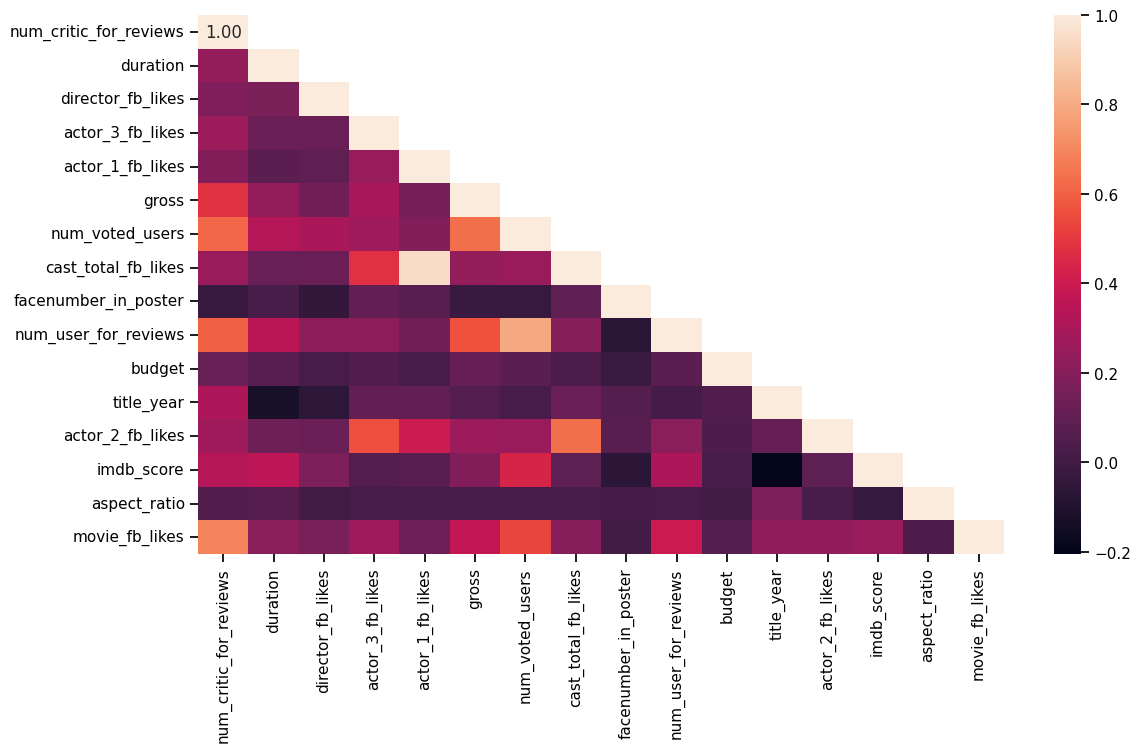

In [185]:
# Matrice de corrélation globale
corr = df.corr(numeric_only=True)
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# Création d'un masque pour masquer les valeurs apparaissant 2 fois
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

#### Remarques

- Certaines données sont très fortement corrélées entre elles, et n'apportent rien individuellement. Nous allons pouvoir réduire le nombre de variables explicatives :
    - La variable cast_total_fb_likes est très corrélée aux fb_likes des acteurs : on va la supprimer, conserver actor_1 et regrouper actor_2_fb_likes et actor_3_fb_likes
    - La variable num_voted_users est très corrélée à num_user_for_reviews et num_critic_for_reviews : nous la gardons, mais nous regroupons les 2 autres en une seule en prenant le ratio

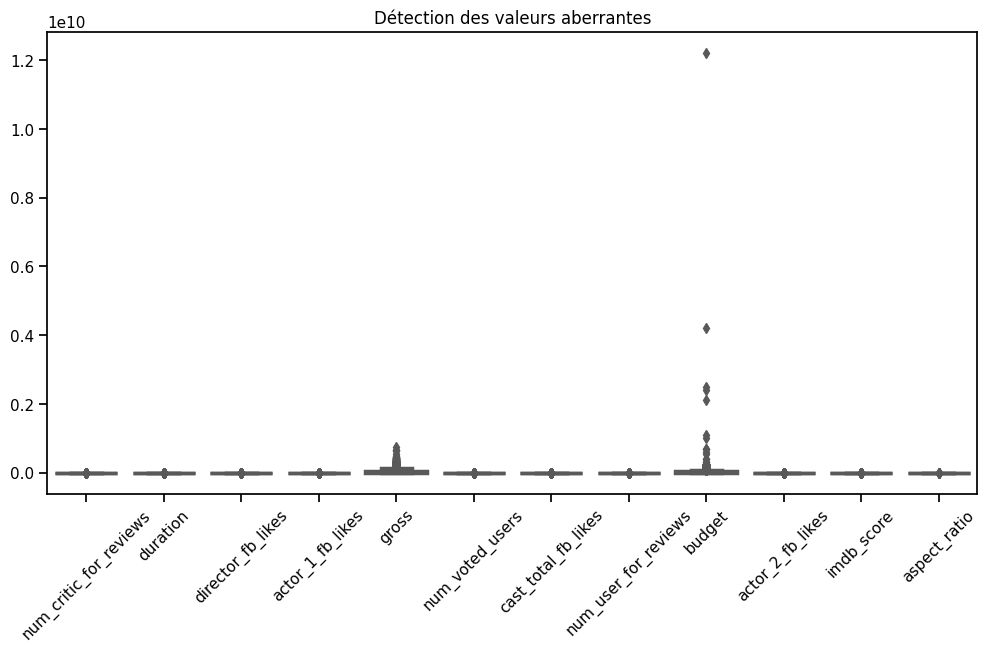

In [34]:
columns_to_plot = ["num_critic_for_reviews", "duration", "director_fb_likes", "actor_1_fb_likes",
                   "gross", "num_voted_users", "cast_total_fb_likes", "num_user_for_reviews",
                   "budget", "actor_2_fb_likes", "imdb_score", "aspect_ratio"]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot], palette="Set2")
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes")
plt.show()



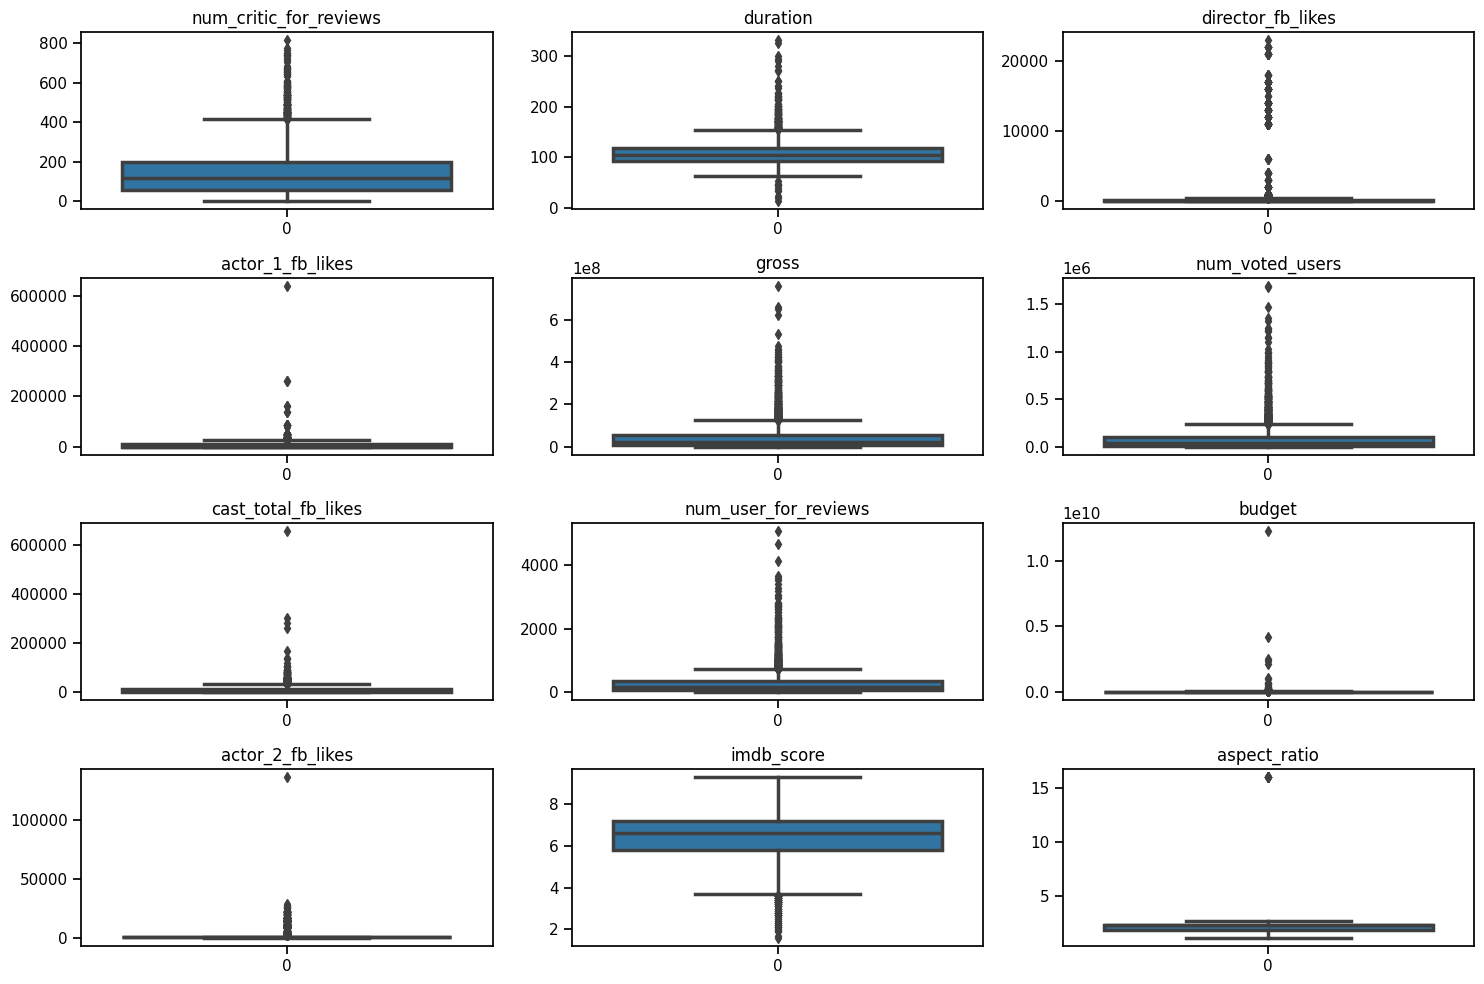

In [35]:
columns_to_plot = ["num_critic_for_reviews", "duration", "director_fb_likes", "actor_1_fb_likes",
                   "gross", "num_voted_users", "cast_total_fb_likes", "num_user_for_reviews",
                   "budget", "actor_2_fb_likes", "imdb_score", "aspect_ratio"]

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#### Remarques

- Certaines données sont très fortement corrélées entre elles, et n'apportent rien individuellement
- Nous pouvons réduire le nombre de variables explicatives, par exemple :
    - Regrouper actor_2_fb_likes et actor_3_fb_likes en une seule variable, et supprimer la variable cast_total_facebook_likes, très fortement corrélée aux autres
    - Regrouper les variables 